In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [8]:
main_directory = os.getcwd()
target_directory = "ml-latest-small"
work_directory = os.path.join(main_directory, target_directory)


In [9]:
movies = pd.read_csv(os.path.join(work_directory, "movies.csv"))
ratings = pd.read_csv(os.path.join(work_directory,'ratings.csv'))

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
final_dataset = ratings.pivot(index='movieId', columns='userId', values='rating')
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
num_user_voted = ratings.groupby('movieId')['rating'].agg('count')  #votes for each movie
num_movies_voted = ratings.groupby('userId')['rating'].agg('count') #votes by each user
num_movies_voted.sort_values()

userId
442      20
406      20
147      20
194      20
569      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Name: rating, Length: 610, dtype: int64

movieId
2571    278
593     279
296     307
318     317
356     329
Name: rating, dtype: int64

In [ ]:
movie_idx = final_dataset.iloc[val[0]]['movieId']

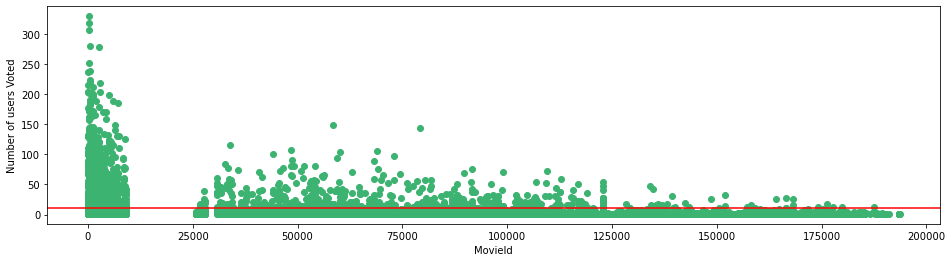

In [16]:
f,ax  = plt.subplots(1,1,figsize=(16,4))
plt.scatter(num_user_voted.index, num_user_voted, color='mediumseagreen')
plt.axhline(y=10, color='r')
plt.xlabel('MovieId')
plt.ylabel('Number of users Voted')
plt.show()

# A movie should have at least 10 user ratings 

# A user should have rated at least 50 movies


In [17]:
final_dataset = final_dataset.loc[num_user_voted[num_user_voted > 10].index, :]

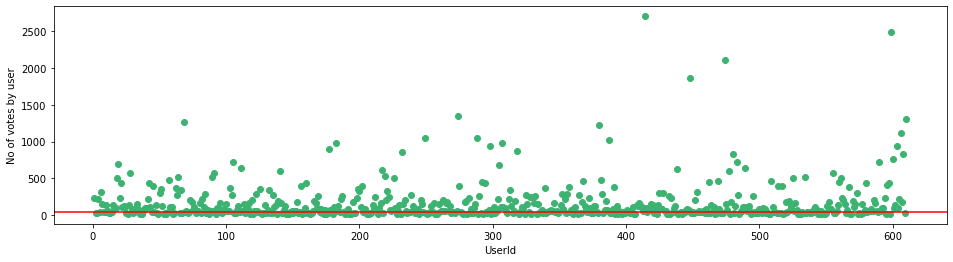

In [18]:
f,ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(num_movies_voted.index, num_movies_voted, color='mediumseagreen')
plt.axhline(y=50, color='r')
plt.xlabel('UserId')
plt.ylabel('No of votes by user')
plt.show()

In [19]:
final_dataset  = final_dataset.loc[:, num_movies_voted[num_movies_voted>50].index]

In [20]:
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# example of how  sparsity works 
sample = np.array([[0,0,3,0,0], [4,0,0,0,2], [0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)

0.7333333333333334


In [22]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [23]:
csr_data

<2121x378 sparse matrix of type '<class 'numpy.float64'>'
	with 72893 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=20, n_jobs=-1)
model.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [25]:
import pickle


In [26]:
data = {"model": model}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [27]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
knn = data['model']

In [28]:
def get_movie_recommendation(movie_name):
    movie_name = movie_name.lower()
    n_movies_to_recommend = 5
    movies['title1'] = movies['title'].str.lower()
    movie_list = movies[movies['title1'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId']== movie_idx].index[0]
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())),key=lambda x:x[1])[:0:-1]
        recommend_frame  = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId']== movie_idx].index
            
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Genre':movies.iloc[idx]['genres'].values[0]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_recommend+1))
        return df
    
    else:
        return 'No  movies found. Please Check for another movie'

In [32]:
get_movie_recommendation("Iron man")

,Title,Genre
1,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
2,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
3,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
4,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
5,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX


In [102]:
def get_most_watched(n):
    most_watched = []
    most_watched_movies = num_user_voted.sort_values().tail(n).index.to_list()
    for val in most_watched_movies:
        idx_1 = movies[movies['movieId']== val].index
        name = movies.iloc[idx_1]['title'].values[0]
        most_watched.append({'Title':name})
    df_most_watched = pd.DataFrame(most_watched,index=range(1,n+1))
    return df_most_watched

In [103]:
get_most_watched(10)

,Title
1,Schindler's List (1993)
2,Terminator 2: Judgment Day (1991)
3,Braveheart (1995)
4,Jurassic Park (1993)
5,Star Wars: Episode IV - A New Hope (1977)
6,"Matrix, The (1999)"
7,"Silence of the Lambs, The (1991)"
8,Pulp Fiction (1994)
9,"Shawshank Redemption, The (1994)"
10,Forrest Gump (1994)


In [98]:
count_group = ratings.groupby("movieId").count()["rating"]

movie_list = count_group[count_group > 10].index.values
movie_list[:5]

array([1, 2, 3, 5, 6], dtype=int64)